# **REVISÃO P2 PROG ESTAT**

## **cap. 9 - transformações e misturas**

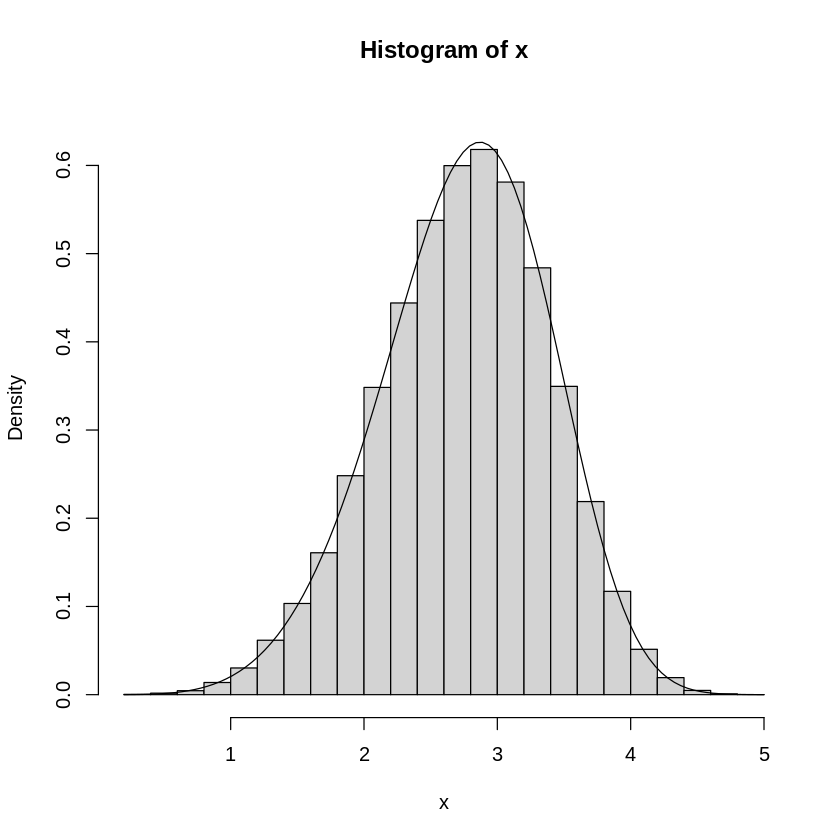

In [ ]:
#EXERCÍCIO 1 - MISTURA
n <- 100000
lambda <- 3
k <- 5

u <- runif(n)  # passo 1 - gere n uniformes(0,1)
y <- (lambda)^k*-log(u)
x <- y^(1/k)

hist(x, freq=FALSE, ylim=c(0, 0.65))
curve(dweibull(x, k, lambda), add=TRUE)

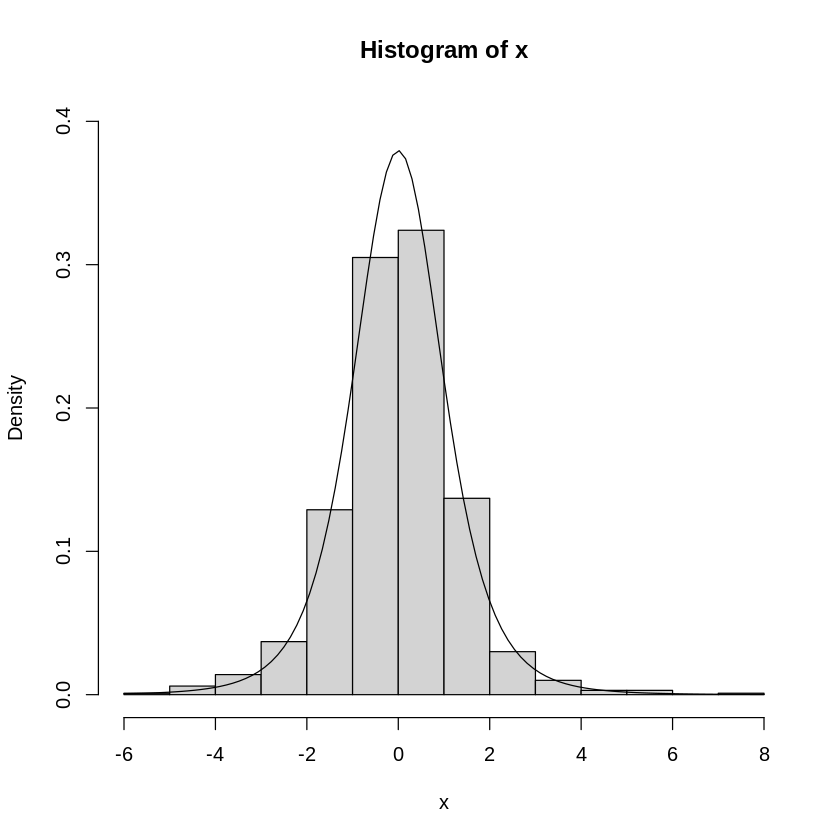

In [ ]:
#EXERCÍCIO 2
n <- 1000
k <- 5

y <- rchisq(n,k)
x <- rnorm(n, mean=0, sd=sqrt(k/y))

hist(x, freq=FALSE, ylim=c(0, 0.4))
curve(dt(x, k), add=TRUE)

In [ ]:
#EXERCÍCIO 3
n <- 1000
lambda <- 5
amostras <- numeric(n)

for(i in 1:n){
  soma <- 0
  k <- 0
  while(TRUE){
    x <- rexp(1, lambda)
    soma <- soma + x

    if(soma > 1){
      amostras[i] <- k
      break
    }
    else{
      k <- k+1
    }
  }
}

amostra_real <- rpois(n, lambda)

c(mean(amostra_real), mean(amostras))
c(var(amostra_real), var(amostras))

[1] 4.893 4.947

[1] 4.972524 4.943134

## **cap. 10 - monte carlo**

In [ ]:
#teoria - estimando π
n <- 100000
z <- numeric(n)

for(i in 1:n){
  x <- 2*runif(1)-1
  y <- 2*runif(1)-1
  z[i] <- ifelse(x^2 + y^2 <= 1, 1, 0)
}

theta <- 4*mean(z)
theta

[1] 3.13808

In [ ]:
#EXERCÍCIO 1
n <- 10000
u <- runif(n, 0, 10)
gx <- 10*sin(u**2)
theta <- mean(gx)

ep <- sqrt(var(gx)/n)
alpha <- 0.05
z_alpha <- qnorm(1-alpha/2)

IC <- c(theta - z_alpha * ep, theta + z_alpha * ep)

cat('Estimativa:', theta, '\n')
cat('Intervalo de confiança:', IC, '\n')
cat('Erro padrão:', ep)

Estimativa: 0.582258 
Intervalo de confiança: 0.4472367 0.7172793 
Erro padrão: 0.06888969

In [ ]:
#EXERCÍCIO 2 - usando Exp(1) truncada em 1
n <- 10000
x <- 1 + rexp(n)
gx <- exp(x)/(exp(1)*x^3)
theta <- mean(gx)

ep <- sqrt(var(gx)/n)
alpha <- 0.05
z_alpha <- (1-alpha/2)

IC <- c(theta-z_alpha*ep, theta+z_alpha*ep)

cat('Estimativa:', theta, '\n')
cat('Intervalo de confiança:', IC, '\n')
cat('Erro padrão:', ep)

Estimativa: 0.4943916 
Intervalo de confiança: 0.4922652 0.4965179 
Erro padrão: 0.002180867

In [ ]:
#EXERCÍCIO 2 - pt. 2
N <- 10000
n <- 100
alpha <- 0.05
z_alpha <- qnorm(1-alpha/2)

theta <- numeric(N)
lower <- numeric(N)
upper <- numeric(N)

proporcao <- 0

for(i in 1:N){
  x <- 1 + rexp(n)
  gx <- exp(x)/(exp(1)*x^3)
  theta[i] <- mean(gx)

  ep <- sqrt(var(gx)/n)

  lower[i] <- theta[i]-z_alpha*ep
  upper[i] <- theta[i]+z_alpha*ep

  if(lower[i] < 0.5 & upper[i] > 0.5){
    proporcao <- proporcao + 1
  }
}

cat('Proporção de estimativas que caem
no intervalo de confiança:', proporcao/N)

Proporção de estimativas que caem 
no intervalo de confiança: 0.9267

In [ ]:
#EXERCÍCIO 4
n <- 10000
x <- rnorm(n,0,1)
y <- rgamma(n,1,1)
gx <- ifelse(x*y>3, 1, 0)
theta <- mean(gx)

ep <- sqrt(var(gx)/n)
alpha <- 0.05
z_alpha <- (1-alpha/2)

IC <- c(theta-z_alpha*ep, theta+z_alpha*ep)

cat('Estimativa:', theta, '\n')
cat('Intervalo de confiança:', IC, '\n')
cat('Erro padrão:', ep)

Estimativa: 0.0257 
Intervalo de confiança: 0.02415709 0.02724291 
Erro padrão: 0.001582467

## **cap. 11 - redução de variância**

In [ ]:
#EXERCÍCIO 1

#monte carlo
n <- 10000
x <- runif(n, 0, pi)
gx <- x^2
theta_mc <- mean(gx)
cat('Estimativa para MC:', theta_mc, '\n')
cat('Variância para MC:', var(gx), '\n')
cat('\n')

#antitéticas
n <- 10000
u <- runif(n)
xi <- pi*u
yi <- pi*(1-u)
gxy <- (xi)^2 + (yi)^2
theta_ant <- mean(gxy)/2
cat("Estimativa para VA's Antitéticas :", theta_ant, '\n')
cat("Variância para VA's Antitéticas:", var(gxy), '\n')

Estimativa para MC: 3.3318 
Variância para MC: 8.740099 

Estimativa para VA's Antitéticas : 3.281979 
Variância para VA's Antitéticas: 2.146449 


In [ ]:
#EXERCÍCIO 3

#monte carlo
n <- 10000
y <- rexp(n)
x <- rnorm(n, mean=y, sd=2)
z <- ifelse(x>1, 1, 0)
theta_mc <- mean(z)
cat('Estimativa para MC:', theta_mc, '\n')
cat('Variância para MC:', var(z), '\n')
cat('\n')

#condicionamento
n <- 10000
y <- rexp(n,1)
gx <- 1 - pnorm((1-y)/2)
theta <- mean(gx)
cat("Estimativa para VA's Antitéticas :", theta, '\n')
cat("Variância para VA's Antitéticas:", var(gx), '\n')
cat('\n')

#melhorando com antitéticas
n <- 10000
u <- runif(n)
x <- -log(u)
y <- -log(1-u)
gxy <- (1-pnorm((1-x)/2)) + (1-pnorm((1-y)/2))
theta_melhor <- mean(gxy)/2
cat("Estimativa melhorada:", theta_melhor, '\n')
cat("Variância melhorada:", var(gxy), '\n')

Estimativa para MC: 0.4847 
Variância para MC: 0.2497909 

Estimativa para VA's Antitéticas : 0.488488 
Variância para VA's Antitéticas: 0.02663859 

Estimativa melhorada: 0.4903415 
Variância melhorada: 0.01234106 


In [6]:
#EXERCÍCIO 4
P <- c(0.1, 0.5, 0.9)

for(p in P){

  cat('PARA P =', p, '\n')

  #monte carlo
  n <- 10000

  b <- rbinom(n,1,p)
  mi <- ifelse(b==1, 2, -1)
  x <- rnorm(n, mean=mi, sd=1)
  gx <- ifelse(x>1, 1, 0)

  theta_mc <- mean(gx)
  cat('Estimativa para MC:', theta_mc, '\n')
  cat('Erro padrão para MC:', sqrt(var(gx)/n), '\n')
  cat('\n')

  #condicionamento
  n <- 10000
  b <- rbinom(n,1,p)
  mi <- ifelse(b==1, 2, -1)
  gx <- 1-pnorm(1-mi)
  theta_cond <- mean(gx)

  cat('Estimativa para condicionamento:', theta_cond, '\n')
  cat('Erro padrão para condicionamento:', sqrt(var(gx)/n), '\n')
  cat('\n')

  #antitéticas
  n <- 10000
  u <- runif(n)
  b1 <- as.numeric(u < p)
  b2 <- as.numeric((1-u)<p)

  mi1 <- ifelse(b1==1, 2, -1)
  mi2 <- ifelse(b2==1, 2, -1)

  g1 <- 1-pnorm(1-mi1)
  g2 <- 1-pnorm(1-mi2)

  theta_ant <- mean(g1+g2)/2

  cat('Estimativa para antitéticas:', theta_ant, '\n')
  cat('Erro padrão para antitéticas:', sqrt(var(g1+g2)/n), '\n')
  cat('\n')
}

PARA P = 0.1 
Estimativa para MC: 0.1011 
Erro padrão para MC: 0.003014762 

Estimativa para condicionamento: 0.1025631 
Erro padrão para condicionamento: 0.002428379 

Estimativa para antitéticas: 0.1046915 
Erro padrão para antitéticas: 0.00327577 

PARA P = 0.5 
Estimativa para MC: 0.4331 
Erro padrão para MC: 0.00495529 

Estimativa para condicionamento: 0.4257443 
Erro padrão para condicionamento: 0.004092692 

Estimativa para antitéticas: 0.4320474 
Erro padrão para antitéticas: 0 

PARA P = 0.9 
Estimativa para MC: 0.765 
Erro padrão para MC: 0.0042402 

Estimativa para condicionamento: 0.7577662 
Erro padrão para condicionamento: 0.002478663 

Estimativa para antitéticas: 0.7604267 
Erro padrão para antitéticas: 0.003260336 



In [21]:
#EXERCÍCIO 7

#antitéticas
n <- 10000
u1 <- runif(n)
u2 <- runif(n)

x1 <- -log(u1)
y1 <- -log(1-u1)
x2 <- -log(u2)
y2 <- -log(1-u2)

gxy1 <- min(x1,y1)
gxy2 <- min(x2,y2)

theta <- mean(gxy1+gxy2)/2
theta

#monte carlo
n <- 10000
u <- runif(n)

x <- -log(u)
y <- -log(1-u)

gxy <- min(x,y)

theta_mc <- mean(gxy)
theta_mc

[1] 4.822378e-05

[1] 4.88642e-05

## **cap. 12 - amostragem por importância**

In [33]:
#EXERCÍCIO 1

#AI
n <- 10000
z <- 5+rexp(1)

fz <- dnorm(z)
hz <- ifelse(z>5, 1, 0)
gz <- exp(-z+5)

az <- fz*hz/gz

theta_ai <- mean(az)

cat('Estimativa para AI:', theta_ai, '\n')
cat('Log da estimativa:', log(theta_ai), '\n')
cat('Log do valor real:', log(pnorm(5,0,1,lower.tail=FALSE)))
cat('\n')

Estimativa para AI: 1.763899e-07 
Log da estimativa: -15.55057 
Log do valor real: -15.065


In [38]:
#EXERCÍCIO 2

#distribuição 1 - uniforme
n <- 10000
u <- runif(n,0,2)

fu <- sqrt(u)
hu <- exp(-u)
gu <- 1/2

au <- fu*hu/gu

theta1 <- mean(au)
cat('Estimativa usando U(0,2):', theta1, '\n')
cat('EP usando uniforme:', sqrt(var(au)/n), '\n')

#distribuição 2 - exp truncada
n <- 10000

u <- runif(n)
e <- -log(1-u*(1-exp(-2)))  #fdp exp(1) truncada em (0,2)

fe <- sqrt(e)*exp(-e)
ge <- exp(-e)/(1-exp(-2))

ae <- fe/ge

theta2 <- mean(ae)
cat('Estimativa usando Exp(1) truncado em (0,2):', theta2, '\n')
cat('EP usando exponencial:', sqrt(var(ae)/n))

Estimativa usando U(0,2): 0.6560191 
EP usando uniforme: 0.001612311 
Estimativa usando Exp(1) truncado em (0,2): 0.6526468 
EP usando exponencial: 0.002915409

In [47]:
#EXERCÍCIO 3

#monte carlo
n <- 10000
x <- rexp(n, 1)
gx <- log(1+x)
theta_mc <- mean(gx)
cat('Estimativa MC:', theta, '\n')
cat('EP MC:', sqrt(var(gx)/n), '\n')

#AI
n <- 10000
lambda <- 2/3
x <- rexp(n, lambda)

fx <- log(1+x)
hx <- exp(-x)
gx <- dexp(lambda)

ax <- fx*hx/gx

theta_ai <- mean(ax)
cat('Estimativa AI:', theta_ai, '\n')
cat('EP AI:', sqrt(var(ax)/n))

Estimativa MC: 0.3247411 
EP MC: 0.004197736 
Estimativa AI: 0.3239447 
EP AI: 0.001643875